# Sistemas Inteligentes

## Exercício Computacional 4 - Agrupamento (Clusterização)

### Identificação do Aluno

#### Nome Completo

William de Souza Gomes

#### RA

11201720874

## Instruções

1. Escolha um dataset, identifique-o e mostre suas características, então indique quais são os seus objetivos com esse dataset (no campo correspondente).

2. Com o dataset já importado para o notebook, faça os pré-processamentos que julgar necessários e, se for conveniente, efetue uma redução de dimensionalidade utilizando um método compatível com seus dados.

3. Utilize ao menos um método de Cross-Validation de sua preferência.

4. Escolha dois métodos de agrupamento (clusterização) para realizar abordagens distintas, então aplique-os ao dataset para chegar ao objetivo indicado por você no próprio notebook.

5. Utilize células intermediárias de tipo _Markdown_ para explicar o que é feito em cada célula de código. Mas não deixe de utilizar comentários breves e pertinentes dentro do próprio código. Isto significa que o desenvolvimento NÃO deve ser feito em uma única célula.

6. Sempre que for cabível, exiba as figuras, os gráficos, os valores (ao menos parte deles) etc., mas procure sempre manter um capricho em todas as saídas.

7. Ao final, comente da forma mais completa possível os resultados obtidos, sempre sugerindo o que poderia ser feito para melhorá-los e fornecendo elementos que contribuam para a sua compreensão.

8. Respeitem as regras gramaticais e procurem manter coesão, coerência e fluidez em seus textos.

9. Apesar de a análise dos resultados ser mais importante do que o código em si, serão analisados critérios como organização e clareza do código, então evitem códigos "poluídos" e confusos.

### Dataset

#### Nome do Dataset

Wholesale customers Data Set 

#### Características do Dataset

Principais características:
- Atributos: 8
- Amostras: 440
- Atributos inteiros
- Tarefa associada: Classificação e Clustering 

Atributos: 
   -  FRESH: annual spending (m.u.) on fresh products (Continuous); 
   -	MILK: annual spending (m.u.) on milk products (Continuous); 
   -	GROCERY: annual spending (m.u.)on grocery products (Continuous); 
   -	FROZEN: annual spending (m.u.)on frozen products (Continuous) 
   -	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
   -	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
   -	CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) 
   -	REGION: customers Region Lisboa, Porto or Other (Nominal)

#### Fonte do Dataset

UCI - Machine Learning Repository
http://archive.ics.uci.edu/ml/datasets/Wholesale+customers

### Objetivos

Analisar o dataset sem as labels e utilizar diferentes ferramentas para avaliar o modelo utilizando clusterização e por fim discutir os resultados obtidos. 

## Desenvolvimento

##### Bibliotecas 

In [1]:
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
import pandas as pd

In [2]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

##### Importando dataset

In [3]:
df = pd.read_csv('Wholesale customers data.csv')
#Mostrando os valores das features do dataset
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [4]:
#Dados estatísticas sobre o dataset
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
#Conferindo novamente o tipo e as dimensões do dataset
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(440, 8)


In [6]:
#Aplicando redução de dimensionalidade
pca3 = PCA(n_components=3)
pca3 = pca3.fit_transform(df)

##### Após a redução de dimensionalidade para 2 dimensões conferimos como ficou a distribuição dos dados
##### Até o momento não temos o target para chegarmos num resultado para a classificação 

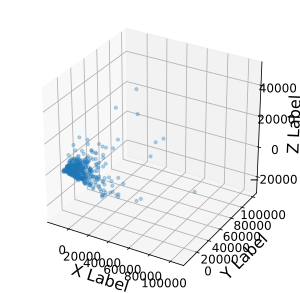

In [7]:
#Analisando a distribuição dos dados para PCA com 3 dimensões

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca3[:, 0], pca3[:,1], pca3[:,2], cmap='viridis', s=10, alpha=0.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


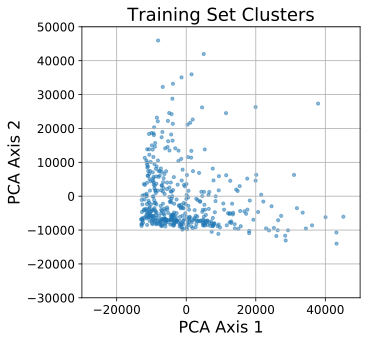

In [8]:
pca2 = PCA(n_components=2)
pca2 = pca2.fit_transform(df)
#Analisando para pca com 2 dimensões
plt.figure()
plt.scatter(x=pca2[:, 0], y=pca2[:, 1],  cmap='viridis', s=10, alpha=0.5)
plt.xlim(-30000, 50000)
plt.ylim(-30000, 50000)
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.show()

In [9]:
# Analisando a classe 'Region'
r1=0
r2 =0
r3 = 0
for x in df['Region']:
    if x == 1:
        r1 += 1
    if x == 2:
        r2 += 1
    if x == 3:
        r3 += 1


print('Region 1:',r1)
print('Region 2:',r2)
print('Region 3:',r3)
#Analisando a classe Channel
ch1 =0
ch2 =0
ch3 =0
for i in df['Channel']:
    if i == 1:
        ch1 += 1
    if i == 2:
        ch2 += 1

print('Channel 1: ',ch1)
print('Channel 2: ',ch2)

Region 1: 77
Region 2: 47
Region 3: 316
Channel 1:  298
Channel 2:  142


Como observado pelo resultado acima há um grande desbalanço no dataset referente à classe 'Region' e no 'Channel'

In [10]:
#Removendo a classe region do dataset
df_reduzido = df.drop(['Region', 'Channel'], axis = 1)

In [11]:
#Como observamos agora temos 6 dimensões
df_reduzido.shape

(440, 6)

In [12]:
#Aplicando redução de dimensionalidade
pca2 = PCA(n_components=2)
pca2 = pca2.fit_transform(df_reduzido)

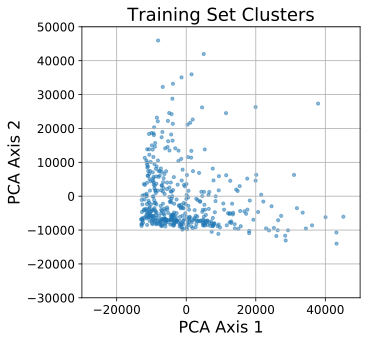

In [13]:
#Analisando para pca com 2 dimensões com dataset reduzido
plt.figure()
plt.scatter(x=pca2[:, 0], y=pca2[:, 1],  cmap='viridis', s=10, alpha=0.5)
plt.xlim(-30000, 50000)
plt.ylim(-30000, 50000)
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.show()

##### Separando dados para treino e teste

In [14]:
X_train, X_test= tts(pca2, test_size = .20)

##### K-MEANS

Analisando algoritmo com melhor número de cluster

In [15]:
# Aqui vamos usar duas métricas para obter o número de cluster que melhor se adapta ao dataset
s_score = []
wcss = []
for i in range(2,21):   
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_train)
    y_pred = kmeans.predict(X_test)
    labels = kmeans.labels_
    s_score.append(silhouette_score(X_train, labels, metric='euclidean'))
    #print('Número de clusters: {} Whitin cluster sum of squares: {} silhouette_score: {}'.formati,kmeans.inertia_)
    print("Número de clusters: {}      ".format(i), "Whitin cluster sum of squares: {}          ".format(round(kmeans.inertia_,1)), "silhouette_score: {} ".format(round(silhouette_score(X_train, labels, metric='euclidean'),3))
          )
    wcss.append(kmeans.inertia_) 


Número de clusters: 2       Whitin cluster sum of squares: 68866861758.9           silhouette_score: 0.425 
Número de clusters: 3       Whitin cluster sum of squares: 41792699549.8           silhouette_score: 0.523 
Número de clusters: 4       Whitin cluster sum of squares: 30505311794.7           silhouette_score: 0.464 
Número de clusters: 5       Whitin cluster sum of squares: 21280795434.5           silhouette_score: 0.438 
Número de clusters: 6       Whitin cluster sum of squares: 16662399438.2           silhouette_score: 0.436 
Número de clusters: 7       Whitin cluster sum of squares: 14048786930.3           silhouette_score: 0.419 
Número de clusters: 8       Whitin cluster sum of squares: 12610323450.4           silhouette_score: 0.375 
Número de clusters: 9       Whitin cluster sum of squares: 11414470977.4           silhouette_score: 0.393 
Número de clusters: 10       Whitin cluster sum of squares: 10057331626.8           silhouette_score: 0.398 
Número de clusters: 11     

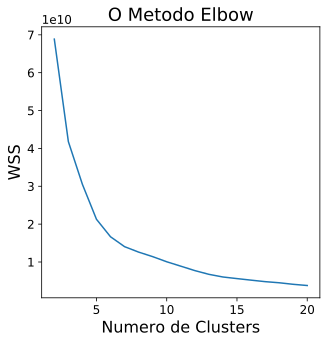

In [16]:
plt.plot(range(2, 21), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()


K-MEANS com K-melhor cluster

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
y_pred = kmeans.predict(X_test)

##### Plotando gráfico com Clusters criado

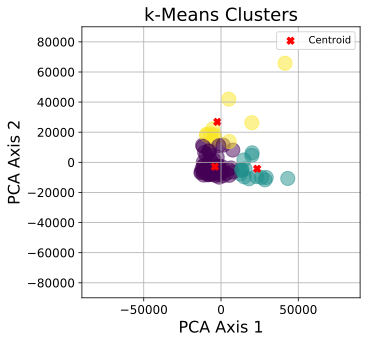

In [18]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred, cmap='viridis', s=200, alpha=0.5)
#plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_pred, cmap='viridis', s=400, alpha=0.5)

plt.xlim(-90000, 90000)
plt.ylim(-90000, 90000)
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('k-Means Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='r', s=50, marker='X', label='Centroid')
plt.legend()
plt.show()

## Affinity Propagation

In [19]:
AP = AffinityPropagation().fit(X_train)
y_pred_ap = AP.predict(X_test)
AP.cluster_centers_indices_
print("Número de clusters: ", AP.cluster_centers_indices_.shape)

Número de clusters:  (23,)


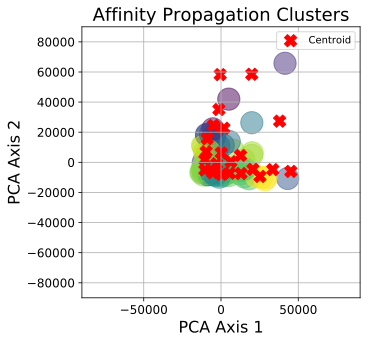

In [20]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred_ap, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-90000, 90000)
plt.ylim(-90000, 90000)
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=AP.cluster_centers_[:,0], y=AP.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()
plt.show()

#### Treinamento com o K-means sem redução de dimensionalidade

In [21]:
X_train, X_test= tts(pca2, test_size = .20)

In [22]:
# Aqui vamos usar duas métricas para obter o número de cluster que melhor se adapta ao dataset
s_score = []
wcss = []
for i in range(2,21):   
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_train)
    y_pred = kmeans.predict(X_test)
    labels = kmeans.labels_
    s_score.append(silhouette_score(X_train, labels, metric='euclidean'))
    #print('Número de clusters: {} Whitin cluster sum of squares: {} silhouette_score: {}'.formati,kmeans.inertia_)
    print("Número de clusters: {}      ".format(i), "Whitin cluster sum of squares: {}          ".format(round(kmeans.inertia_,1)), "silhouette_score: {} ".format(round(silhouette_score(X_train, labels, metric='euclidean'),3))
          )
    wcss.append(kmeans.inertia_) 


Número de clusters: 2       Whitin cluster sum of squares: 73033741370.7           silhouette_score: 0.536 
Número de clusters: 3       Whitin cluster sum of squares: 46953318632.6           silhouette_score: 0.52 
Número de clusters: 4       Whitin cluster sum of squares: 36225421674.4           silhouette_score: 0.434 
Número de clusters: 5       Whitin cluster sum of squares: 27097623948.8           silhouette_score: 0.447 
Número de clusters: 6       Whitin cluster sum of squares: 22149771777.3           silhouette_score: 0.425 
Número de clusters: 7       Whitin cluster sum of squares: 17190489054.3           silhouette_score: 0.435 
Número de clusters: 8       Whitin cluster sum of squares: 14351714079.7           silhouette_score: 0.42 
Número de clusters: 9       Whitin cluster sum of squares: 12571765154.7           silhouette_score: 0.414 
Número de clusters: 10       Whitin cluster sum of squares: 11283049456.6           silhouette_score: 0.38 
Número de clusters: 11       W

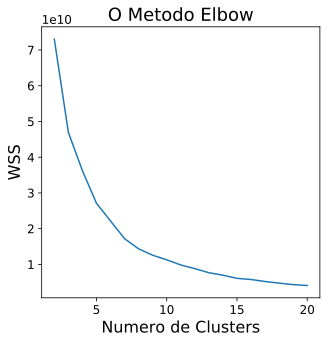

In [23]:
plt.plot(range(2, 21), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

## Discussão sobre os resultados

   Antes do treinamento fez-se uma análise do dataset e conferiu-se que há uma grande desbalanceamento do dataset nas classes Region e Channel então retirou-se as duas classes do dataset. Também constatou-se que a diferença entre o mínimo e o máximo valor de cada classe era absurdamente alta, dada essa condição, surge uma proposta para o problema - criar cluster com o gasto dos compradores.
   Após feito o tratamento dos dados utilizamos o PCA para a redução de dimensionalidade usando como critério 2 dimensões - e plotamos um gráficos e não apareceu grupos bem definidos no gráfico.
       Foram utilizados dois algortmos de clustering - K-Means e o Affinity Propagation. O K-means se saiu melhor que o Affinity Propagation. No k-means fizemos uma interação de 2 à 20 e para cada interação calculamos duas métricas para decidir qual o melhor K-cluster. O resultado dessas métricas não foram tão promissoras quanto esperavamos. O primeiro que foi o Silhouette Score não se mostou tão ótimo, ficando na casa dos 0,48 - 0,51 para no máximo 3 cluster e na contra-mão o Whitin Sum of Squares deu uma queda brusca na variância para k aproximadamente 5. Então houve uma indefinição quanto ao melhor número de clusters. Optando para k entre 2 e 5. Por último treinou-se o mesmo modelo sem usar a redução de dimensionalidade, o resultado foi muito próximo, não havendo uma mudança significativa do modelo levando a conclusão que o PCA se mostrou bom uma vez que diminuimos o custo computacional obtendo mesmos resultados, porém com a ressalva de que não houve uma melhora significativa do modelo. Vale lembrar que o nosso dataset é limitado a 440 amostras então fica para posteriori a análise do dataset e determinar se foi insuficiente o número de amostras.
